# Introduction to Portfolio Construction and Analysis with Python
EDHEC Business School  
https://www.coursera.org/learn/introduction-portfolio-construction-python


## Week 1 - Basic of Returns and Risk Measures

- How returns are calculated
- How to test normality of return distribution
- Various statistical measures - Standard Deviation, Skewness and Kurtosis
- Various risk measures 
    1. Volatility
    2. Semideviation
    3. VaR, Historical, Gaussian, Cornish-Fisher with specific confidence level
    4. CVaR / Expected Shortfall

### Importing Data

In [1]:
import sys  
sys.path.append('../src') 
from edhec_risk_kit import *

import numpy as np
import pandas as pd
import edhec_risk_kit as erk

DATA_FOLDER = '../data/'

In [2]:
hfi = erk.get_hfi_returns()

### Statistical Analysis on Hedge Fund Index Returns
#### Normality Test
Check whether the returns are normally distributed and have a better understand which risk measure to use risk analysis

In [3]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

#### Volatilty (Standard Deviation)

In [4]:
hfi.aggregate(np.std)

Convertible Arbitrage     0.016567
CTA Global                0.023335
Distressed Securities     0.017042
Emerging Markets          0.032538
Equity Market Neutral     0.008130
Event Driven              0.016744
Fixed Income Arbitrage    0.011539
Global Macro              0.014722
Long/Short Equity         0.019935
Merger Arbitrage          0.009619
Relative Value            0.011484
Short Selling             0.047746
Funds Of Funds            0.015566
dtype: float64

#### Skewness

In [5]:
hfi.aggregate(erk.skewness)

Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

#### Kurtosis

In [6]:
hfi.aggregate(erk.kurtosis)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

#### Semideviation
Volatility of negative returns

In [7]:
hfi.aggregate(erk.semideviation)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [8]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

#### Summary Statistics

In [9]:
stats_list = pd.concat([hfi.aggregate(np.std), hfi.aggregate(erk.skewness), 
           hfi.aggregate(erk.kurtosis), hfi.aggregate(erk.semideviation)], axis=1)
stats_list.columns = ['volatility','skewness','kurtosis','semideviation']
stats_list

,volatility,skewness,kurtosis,semideviation
Convertible Arbitrage,0.016567,-2.639592,23.280834,0.019540
CTA Global,0.023335,0.173699,2.952960,0.012443
Distressed Securities,0.017042,-1.300842,7.889983,0.015185
Emerging Markets,0.032538,-1.167067,9.250788,0.028039
Equity Market Neutral,0.008130,-2.124435,17.218555,0.009566
Event Driven,0.016744,-1.409154,8.035828,0.015429
Fixed Income Arbitrage,0.011539,-3.940320,29.842199,0.017763
Global Macro,0.014722,0.982922,5.741679,0.006579
Long/Short Equity,0.019935,-0.390227,4.523893,0.014051
Merger Arbitrage,0.009619,-1.320083,8.738950,0.008875


### Value-At-Risk Measures

- Historic VaR (Percentile cutoff method)
- Parametric VaR (Gaussian normal distribution)
- Modified Cornish-Fisher VaR (Adjusted for skewness and kurtosis of return distribution)

In [10]:
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [11]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [12]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [13]:
erk.var_gaussian(hfi, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

### Conditional Value-at-Risk (Expected Shortfall)

In [14]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

### Summary of Risk Measures

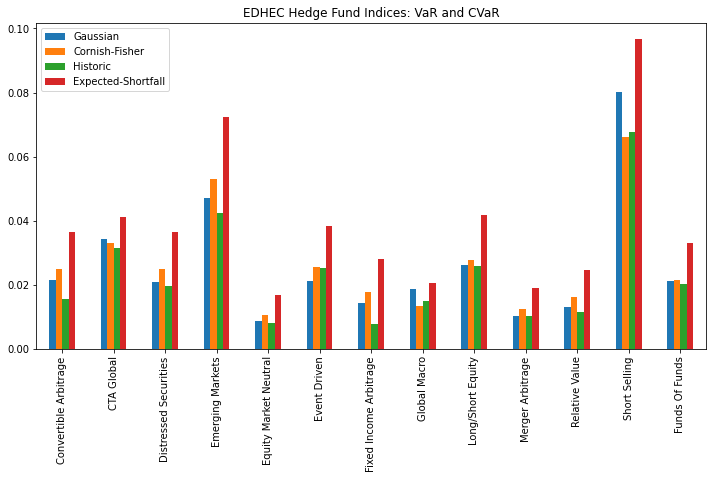

In [15]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi), erk.cvar_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ['Gaussian', 'Cornish-Fisher', 'Historic', 'Expected-Shortfall']
comparison.plot.bar(title='EDHEC Hedge Fund Indices: VaR and CVaR', figsize=(12,6))